In [1]:
import ares
from millicharge.params import LCDMParams, DMBParams, ARESParams

In [2]:
lcdm_cosmo = LCDMParams()
dmb_cosmo = DMBParams()

lcdm = ARESParams(lcdm_cosmo)
dmb = ARESParams(dmb_cosmo)
dmb_newpk = ARESParams(dmb_cosmo, use_classy_pk=True)

sim_lcdm = ares.simulations.Global21cm(**lcdm.all_kwargs)
sim_dmb = ares.simulations.Global21cm(**dmb.all_kwargs)
sim_dmb_newpk = ares.simulations.Global21cm(**dmb_newpk.all_kwargs)

Using DMBParams.  Setting include_dm to True.
Using DMBParams.  Setting include_dm to True.
# Loaded $ARES/input/inits/inits_planck_TTTEEE_lowl_lowE_best.txt.

##############################################################################################################
####                                      ARES Simulation: Overview                                       ####
##############################################################################################################
#### ---------------------------------------------------------------------------------------------------- ####
#### Uniform Backgrounds                                                                                  ####
#### ---------------------------------------------------------------------------------------------------- ####
####               sfrd      sed    radio    O/IR    Ly-a     LW     Ly-C   X-ray    RTE                  ####
#### pop #0  :    fcoll      yes                      x       x

In [3]:
sim_dmb.run()
sim_lcdm.run()
sim_dmb_newpk.run()

None
None
None


/Users/tmorton/miniconda3/envs/millicharge/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


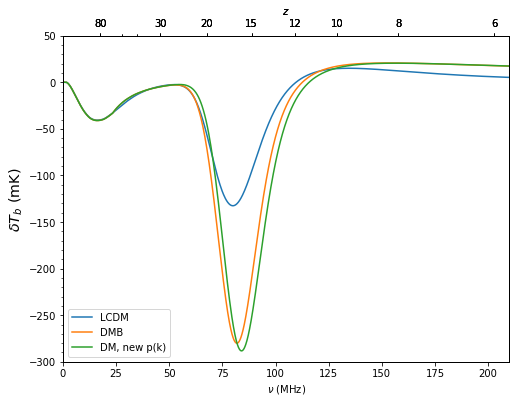

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,6))

sim_lcdm.GlobalSignature(ax=ax, label=r'LCDM')
sim_dmb.GlobalSignature(ax=ax, label=r'DMB')
sim_dmb_newpk.GlobalSignature(ax=ax, label='DM, new p(k)')

ax.legend()